In [72]:
import turicreate

In [73]:
train=turicreate.SFrame('image_train_data')

# Computing summary statistics of data

In [74]:
sketch=turicreate.Sketch(train['label'])

In [75]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [76]:
cat=train[train['label']=='cat']
dog=train[train['label']=='dog']
automobile=train[train['label']=='automobile']
bird=train[train['label']=='bird']

In [77]:
knncat=turicreate.nearest_neighbors.create(cat,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [78]:
knndog=turicreate.nearest_neighbors.create(dog,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [79]:
knnbird=turicreate.nearest_neighbors.create(bird,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [80]:
knnauto=turicreate.nearest_neighbors.create(automobile,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [81]:
test=turicreate.SFrame("image_test_data")

,id,image,label,deep_features,image_array
0,0,,cat,"[1.1346900463104248, 0.0, 0.0, 0.0, 0.03664976358413696, 0.0, 9.353598594665527, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3807746171951294, 0.19604480266571045, 0.49913910031318665, 0.0, 0.6409578919410706, 0.0, 0.7487727403640747, 0.0, 0.0, 0.0, 0.21078139543533325, 0.8158698081970215, 0.0, 0.0, 0.0, 0.0, 0.7258063554763794, 0.07810157537460327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5415886640548706, 0.0, 0.0, 1.3465909957885742, 0.0, 1.0266674757003784, 0.0, 0.0, 0.0, 0.18154239654541016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.48050999641418457, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.960645318031311, 0.9239095449447632, 0.0, 2.424736261367798, 0.0, 0.0, 0.0, 0.0, 0.0, 3.5506184101104736, 0.0, 0.0, 1.3895796537399292, 0.0, 0.0, 0.0, 0.9751324653625488, 0.5319417715072632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3387210369110107, 0.6500557661056519, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[158.0, 112.0, 49.0, 159.0, 111.0, 47.0, 165.0, 116.0, 51.0, 166.0, 118.0, 53.0, 160.0, 112.0, 46.0, 156.0, 109.0, 41.0, 162.0, 115.0, 47.0, 159.0, 113.0, 45.0, 158.0, 111.0, 44.0, 159.0, 113.0, 41.0, 161.0, 116.0, 41.0, 160.0, 111.0, 52.0, 161.0, 111.0, 49.0, 166.0, 117.0, 41.0, 169.0, 117.0, 45.0, 170.0, 119.0, 44.0, 167.0, 117.0, 40.0, 162.0, 113.0, 38.0, 160.0, 111.0, 39.0, 160.0, 112.0, 43.0, 156.0, 109.0, 44.0, 149.0, 107.0, 45.0, 150.0, 107.0, 45.0, 148.0, 106.0, 43.0, 149.0, 107.0, 44.0, 143.0, 101.0, 39.0, 140.0, 98.0, 43.0, 141.0, 97.0, 41.0, 143.0, 97.0, 38.0, 137.0, 95.0, 36.0, 126.0, 91.0, 36.0, 116.0, 85.0, 33.0, 152.0, 112.0, 51.0, 151.0, ...]"

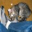

In [82]:
test[0:1].explore()

In [84]:
def getquerybylabel(queryresult):
    return train.filter_by(queryresult['reference_label'],'id')

In [88]:
catq=lambda x: getquerybylabel(knncat.query(test[x:x+1]))['image'].explore()
dogq=lambda x: getquerybylabel(knndog.query(test[x:x+1]))['image'].explore()

In [99]:
knncat.query(test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 4.942ms      |

| Done         |         | 100         | 57.741ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [100]:
knndog.query(test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 11.31ms      |

| Done         |         | 100         | 51.796ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

In [101]:
cattest=test[test['label']=='cat']
dogtest=test[test['label']=='dog']
automobiletest=test[test['label']=='automobile']
birdtest=test[test['label']=='bird']

In [102]:
knncat.query(dogtest,k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 581.222ms    |

| Done         | 509000  | 100         | 726.394ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,33,36.419607706754384,1
1,30606,38.83532688735542,1
2,5545,36.97634108541546,1
3,19631,34.575007291446106,1
4,7493,34.77882479101661,1
5,47044,35.11715782924591,1
6,13918,40.60958309132649,1
7,10981,39.90368673062214,1
8,45456,38.067470016821176,1
9,44673,42.72587329506032,1


In [106]:
newtable=turicreate.SFrame({'dogcat':knncat.query(dogtest,k=1)['distance'],'dogauto':knnauto.query(dogtest,k=1)['distance'],"dogbird":knnbird.query(dogtest,k=1)['distance'], "dogdog":knndog.query(dogtest,k=1)['distance']})

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 571.216ms    |

| Done         | 509000  | 100         | 745.532ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 540.971ms    |

| Done         | 509000  | 100         | 772.951ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 59000   | 12.3431     | 600.689ms    |

| Done         | 478000  | 100         | 764.17ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 483.35ms     |

| Done         | 509000  | 100         | 728.726ms    |

+--------------+---------+-------------+--------------+

In [107]:
newtable

dogauto,dogbird,dogcat,dogdog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [115]:
ans=newtable[newtable['dogdog']<newtable['dogbird']]



In [117]:
ans=ans[ans['dogdog']<ans['dogcat']]

In [118]:
ans=ans[ans['dogdog']<ans['dogauto']]

In [119]:
ans

dogauto,dogbird,dogcat,dogdog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
44.943270702656925,40.96125773991599,40.07334854106311,36.23050539743552
42.88640613992419,40.148114504835995,39.09035764803644,39.0045609157312


In [120]:
len(ans)

678

In [121]:
len(newtable)

1000